# Week7 支持向量机
- 没有核函数的SVM其实与逻辑回归类似  
  当y=1时  
  逻辑回归的代价补偿为:   
    $$-log\frac{1}{1+e^{-\theta^Tx}}$$
  SVM的代价补偿为: (即当$\theta^Tx$大于1时惩罚才为0)
    $$\begin{cases}
    0& \theta^Tx>=1\\
    -\theta^Tx + 1& \text{otherwise}
    \end{cases}$$
  当y=0时
  逻辑回归的代价补偿为:   
    $$-log(1-\frac{1}{1+e^{-\theta^Tx}})$$
  SVM的代价补偿为: (即当$\theta^Tx$小于-1时惩罚才为0)
    $$\begin{cases}
    0& \theta^Tx<=-1\\
    \theta^Tx + 1& \text{otherwise}
    \end{cases}$$
- SVM的数学原理  
  SVM的代价函数为 $F = C*\sum_{i=0}^m{cost_i} + \frac{1}{2}\sum_{i=1}^n\theta_j^2$ 其中Ｃ为类似逻辑回归里lambda的倒数  
  当C很大时, 则要求F的第一项为0, 并使$\frac{1}{2}\sum_{i=1}^n\theta_j^2$最小  
  设所求的参数组成向量为$\vec \theta$, 则使$||\vec \theta||$最小, 同时要求$y^{(i)}=1$时 $\vec \theta*\vec x^{(i)}>=1$; $y^{(i)}=0$时 $\vec \theta*\vec x^{(i)}<=-1$, 即使得预测惩罚为0  
  $\vec \theta*\vec x^{(i)}$为$||\vec \theta||*p^{(i)}$其中$p^{(i)}$为$\vec x^{(i)}$在$\vec \theta$上的投影, 即该样本到Decision Boundary的距离. 为了使$||\vec \theta||$最小, 则让$p^{(i)}$尽量大, 即使样本中离Decision Boundary最近的点的距离尽量大. 所以SVM又叫做large margin分类器, 这个$p^{(i)}$即为margin
- 核函数  
之前的SVM所得到的Decision Boundary为线性的, 为了得到非线性的Decision Boundary最简单的想法是像之前的逻辑回归一样引入多项式, 但我们并不清楚准确的多项式模型, 需要多次尝试才可能找到合适的次数. 因此SVM使用核函数的概念.
  1. 高斯核函数
     $$f_i=similarity(x, l^{i})=exp(-\frac{||x-l^{(i)}||^2}{2\sigma^2})$$
  对每个样本使用上述核函数得到m特征, 最后的输入为m * m的矩阵, 此时的Decision Boundary为非线性的  
  2. 将所有样本经过高斯核函数转换之后就可以按照之前的方法进行求最优值. 不过这部分计算一般都是使用现成的库, 因为其中有许多根据核函数性质的优化.    C类似于lambda的倒数, 过大的C导致过拟合, 过小的C导致欠拟合.
- 多分类的SVM可以直接使用库中的multi-class claasification, 也可以按照逻辑回归中提到的one to all方法
- 使用环境: 当n很多时, 使用逻辑回归, 或者无核函数的SVM; 当n少, m数量适中时(n=1-1000, m=10-10000)使用带高斯核函数的SVM; 当n小m大时(n=1-1000, m=50000+), 增加更多的特征, 使用逻辑回归或无核函数的SVM
- SVM相对于逻辑回归的主要区别是SVM仅关注分类面附近的局部点, 即支持向量, 而逻辑回归则关注整个样本集.
- [逻辑回归和SVM的异同](https://www.cnblogs.com/Peyton-Li/p/7620081.html)

In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import scipy.optimize as op
from sklearn import svm
import re
import nltk

data1 = sio.loadmat('data/ex6data1.mat')
X1 = data1['X']
y1 = data1['y']

[0, 4.5, 1.5, 5]

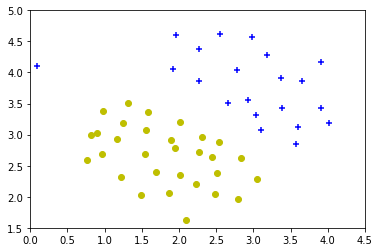

In [17]:
def plotData(X, y):
    positive_X = X[y.flatten()==1, :]
    nagtive_X = X[y.flatten()==0, :]
    plt.scatter(positive_X[:, 0], positive_X[:, 1], c='b', marker='+')
    plt.scatter(nagtive_X[:, 0], nagtive_X[:, 1], c='y', marker='o')
    
plotData(X1, y1)
plt.axis([0,4.5,1.5,5])   

In [3]:
def plt_decision_boundary(my_svm, xmin, xmax, ymin, ymax):
    val_num = 100
    xvals = np.linspace(xmin, xmax, val_num)
    yvals = np.linspace(ymin, ymax, val_num)
    xv, yv = np.meshgrid(xvals, yvals)
    zvals = my_svm.predict(np.array([i for i in zip(xv.flatten(), yv.flatten())]))
    plt.contour(xv, yv, zvals.reshape(val_num, val_num), [0])
    plt.axis([xmin, xmax, ymin, ymax])

In [4]:
clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovo')
clf.fit(X1, y1.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'SVM Decision Boundary with C=1 (Example Dataset 1)')

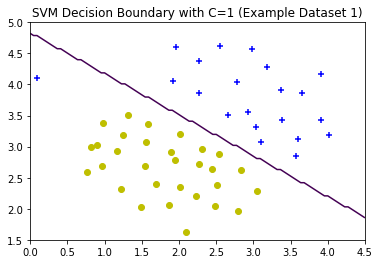

In [5]:
# 绘制C=1时的Decision Boundary
clf1 = svm.SVC(C=1, kernel='linear', decision_function_shape='ovo')
clf1.fit(X1, y1.ravel())
plotData(X1, y1)
plt_decision_boundary(clf1, 0, 4.5, 1.5, 5)
plt.title('SVM Decision Boundary with C=1 (Example Dataset 1)')

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'SVM Decision Boundary with C=100 (Example Dataset 1)')

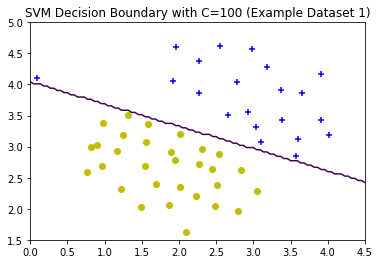

In [6]:
# 绘制C=1时的Decision Boundary
clf100 = svm.SVC(C=100, kernel='linear', decision_function_shape='ovo')
clf100.fit(X1, y1.ravel())
plotData(X1, y1)
plt_decision_boundary(clf100, 0, 4.5, 1.5, 5)
plt.title('SVM Decision Boundary with C=100 (Example Dataset 1)')

In [9]:
# Implement Gaussian Kernel
def gaussian_kernel(x1, x2, sigma):
    difference = ((x1-x2)**2).sum()
    return np.exp(-difference/(2*sigma**2))

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
print(gaussian_kernel(x1, x2, sigma))  # 输出0.324652

0.32465246735834974


In [14]:
data2 = sio.loadmat('data/ex6data2.mat')
X2 = data2['X']
y2 = data2['y']

(863, 2)
(863, 1)


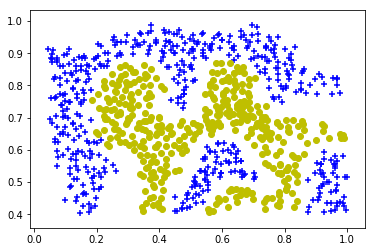

In [19]:
print(X2.shape)
print(y2.shape)
plotData(X2, y2)

/usr/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'SVM(Gaussian Kernel)Decision Boundary with C=1 (Example Dataset 2)')

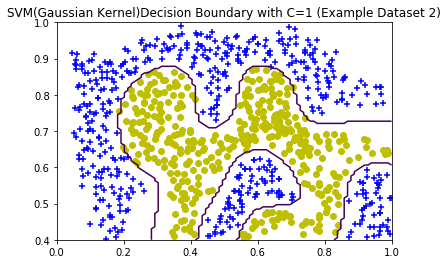

In [24]:
sigma = 0.1
clf = svm.SVC(C=1, kernel='rbf', gamma=sigma**(-2), decision_function_shape='ovo')
clf.fit(X2, y2.ravel())  # ravel返回的是视图, flatten返回的拷贝
plotData(X2, y2)
plt_decision_boundary(clf, 0, 1.0, 0.4, 1.0)
plt.title('SVM(Gaussian Kernel)Decision Boundary with C=1 (Example Dataset 2)')

(211, 2)
(211, 1)
(200, 2)
(200, 1)


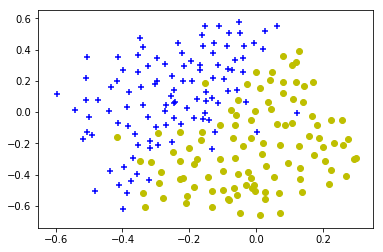

In [31]:
data3 = sio.loadmat('data/ex6data3.mat')
X3 = data3['X']
y3 = data3['y']
Xval = data3['Xval']
yval = data3['yval']
print(X3.shape)
print(y3.shape)
print(Xval.shape)
print(yval.shape)
plotData(X3, y3)

In [56]:
def train_and_test(X, y, Xval, yval, C, sigma):
    clf = svm.SVC(C=C, kernel='rbf', gamma=sigma**(-2), decision_function_shape='ovo')
    clf.fit(X, y.ravel())
    predict = clf.predict(Xval)
    return (predict==yval.ravel()).sum() / len(predict)

lC = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 40]
lsigma = lC
res = np.zeros((8,8))
for i in range(len(lC)):
    for j in range(len(lsigma)):
        res[i, j] = train_and_test(X3, y3, Xval, yval, lC[i], lsigma[j])
print(res)
m, n = np.where(res == res.max())
print('最大的值为', res.max())
for i in range(len(m)):
    print('其索引为: {}, {}'.format(m[i], n[i]))

[[0.435 0.435 0.435 0.435 0.435 0.435 0.435 0.435]
 [0.435 0.435 0.435 0.9   0.795 0.435 0.435 0.435]
 [0.435 0.435 0.86  0.93  0.845 0.535 0.435 0.435]
 [0.435 0.465 0.965 0.95  0.91  0.825 0.435 0.435]
 [0.54  0.885 0.965 0.95  0.94  0.87  0.5   0.435]
 [0.555 0.88  0.945 0.955 0.925 0.915 0.82  0.435]
 [0.555 0.88  0.945 0.96  0.925 0.93  0.865 0.435]
 [0.555 0.88  0.91  0.96  0.935 0.935 0.915 0.815]]
最大的值为 0.965
其索引为: 3, 2
其索引为: 4, 2


/usr/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, 'SVM(Gaussian Kernel)Decision Boundary(Example Dataset 3)')

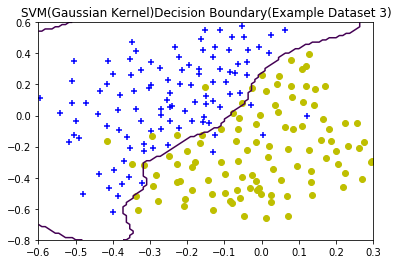

In [64]:
# 选择最优的参数, C为0.1或-0.3, sigma为0.03;
clf = svm.SVC(lC[3], kernel='rbf', gamma=lsigma[2]**(-2), decision_function_shape='ovo')
clf.fit(X3, y3.ravel())
plotData(X3, y3)
plt_decision_boundary(clf, -0.6, 0.3, -0.8, 0.6)
plt.title('SVM(Gaussian Kernel)Decision Boundary(Example Dataset 3)')

## Spam Classification

In [70]:
# email preprocessing
with open("data/emailSample1.txt", "r") as f:
    sample = f.read()
print(sample)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [89]:
# 这一部分抄的.......
def preProcess(text):
    text = text.lower()
    text = re.sub('<[^<>]+>', ' ', text);
    text = re.sub('(http|http)://[^\s]*', 'httpaddr', text)
    text = re.sub('[^\s]+@[^\s]+.com', 'emailaddr', text)
    text = re.sub('\d+', 'number', text)
    text = re.sub('[$]+', 'dollar', text)
    return text
def email2TokenList( raw_email ):
    """
    Function that takes in preprocessed (simplified) email, tokenizes it,
    stems each word, and returns an (ordered) list of tokens in the e-mail
    """
    
    # I'll use the NLTK stemmer because it more accurately duplicates the
    # performance of the OCTAVE implementation in the assignment
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = preProcess( raw_email )

    #Split the e-mail into individual words (tokens) (split by the delimiter ' ')
    #but also split by delimiters '@', '$', '/', etc etc
    #Splitting by many delimiters is easiest with re.split()
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    #Loop over each word (token) and use a stemmer to shorten it,
    #then check if the word is in the vocab_list... if it is,
    #store what index in the vocab_list the word is
    tokenlist = []
    for token in tokens:
        
        #Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token);

        #Use the Porter stemmer to stem the word
        stemmed = stemmer.stem( token )
        
        #Throw out empty tokens
        if not len(token): continue
            
        #Store a list of all unique stemmed words
        tokenlist.append(stemmed)
            
    return tokenlist
print(email2TokenList(preProcess(sample)))     # 最后会得到该email的token序列

['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', 're', 'expect', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr']


In [109]:
# 建立词汇表
vocabulary = {}
with open("data/vocab.txt", "r") as f:
    for vocab in f.readlines():
        num, word = vocab.split()
        vocabulary[word] = int(num)


In [110]:
def processEmail(email):
    email = email2TokenList(preProcess(email))
    return [vocabulary[word] for word in email if word in vocabulary]
print(processEmail(sample))

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1893, 1364, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


In [111]:
# Feature Extraction
def emailFeatures(word_indices):
    res = np.zeros(1899)
    for i in word_indices:
        res[i] = 1
    return res
ef = emailFeatures(processEmail(sample))
print(len(ef))
print((ef>0).sum())

1899
45


In [115]:
# Train Linear SVM for Spam Classification
train_spam = sio.loadmat('data/spamTrain.mat')
trainX_spam = train_spam['X']
trainy_spam = train_spam['y']
print(trainX_spam.shape)
print(trainy_spam.shape)

(4000, 1899)
(4000, 1)


In [117]:
# 使用训练集训练, 以及求准确率
C = 0.1
model = svm.SVC(C, kernel='linear', decision_function_shape='ovo')
model.fit(trainX_spam, trainy_spam.ravel())
p = model.predict(trainX_spam)
print(np.mean(p==trainy_spam.ravel()))

0.99825


In [121]:
# 在测试集中求准确率
test_spam = sio.loadmat('data/spamTest.mat')
testX_spam = test_spam['Xtest']
testy_spam = test_spam['ytest']
print(np.mean(model.predict(testX_spam) == testy_spam.ravel()))

0.989


In [156]:
# Top Predictors for Spam
print(model.coef_.shape)  # 为线性模型的参数
sorted_indices = np.argsort(model.coef_).ravel()   # 从小到大
print(sorted_indices)

print('The Top predictors of spam: ', [list(vocabulary.keys())[i] for i in sorted_indices[-15:]])


(1, 1899)
[1560 1665 1764 ... 1397  297 1190]
The Top predictors of spam:  ['hour', 'ga', 'lo', 'nbsp', 'most', 'pleas', 'price', 'will', 'dollar', 'basenumb', 'visit', 'guarante', 'remov', 'click', 'our']
